<a href="https://colab.research.google.com/github/KimJisanER/code_jjambbong/blob/main/metabolism_dacon_0823_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

[+] 0.0s
conda-forge/linux-64  ⣾  
cond

In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [118]:
train_data = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/test.csv')

In [127]:
train_data['MLM'] = train_data['MLM'].apply(lambda x: 100 if x >= 100 else x)
train_data['HLM'] = train_data['HLM'].apply(lambda x: 100 if x >= 100 else x)

train_data['MLM'] = train_data['MLM'].apply(lambda x: 0.1 if x < 1 else x)
train_data['HLM'] = train_data['HLM'].apply(lambda x: 0.1 if x < 1 else x)

In [134]:
train_ov = train_data[(train_data['MLM'] < 99) & (train_data['HLM'] < 99)]

In [135]:
train_ov.loc[:, 'MLM'] = np.log1p(100 - train_ov['MLM'])
train_ov.loc[:, 'HLM'] = np.log1p(100 - train_ov['HLM'])

In [136]:
train_ov

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,4.317355,3.918403,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,4.272909,3.920190,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,4.558225,3.001118,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.556925,4.595120,4.771,494.652,6,0,5,3.475,92.60
5,TRAIN_0005,COc1c(F)c(F)cc2c(=O)c(C(=O)NCCCN3CCCC3=O)cn(C3...,4.295379,3.537184,1.335,419.422,4,1,7,1.335,78.95
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,4.599595,4.584161,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,4.181134,3.977249,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,3.803324,4.597239,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,4.614130,4.587312,0.989,284.696,5,1,5,0.989,91.51


In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

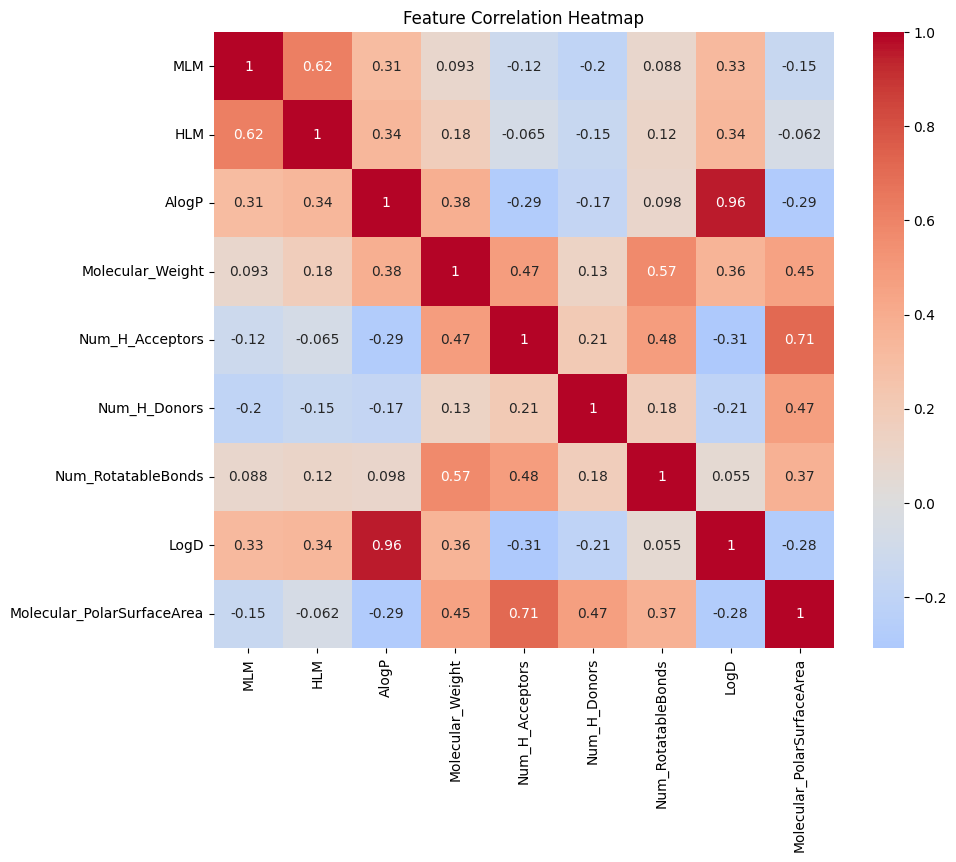

In [138]:
# 상관관계 행렬 계산
correlation_matrix = train_ov.iloc[:,2:].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

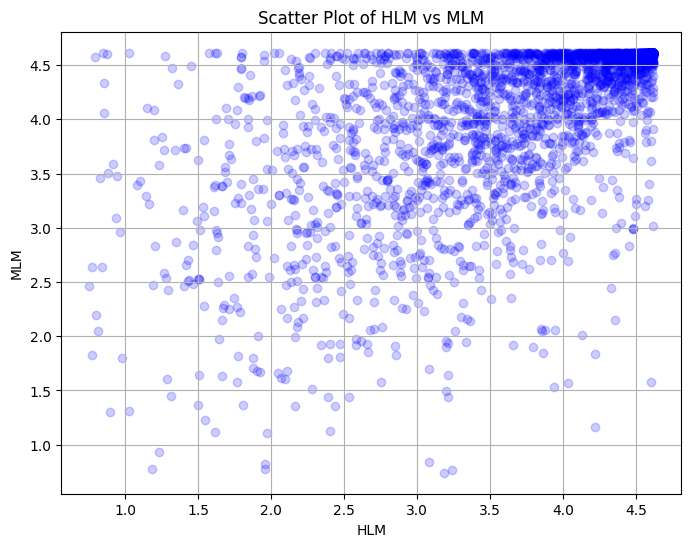

In [139]:
# 산점도 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(train_ov['HLM'], train_ov['MLM'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of HLM vs MLM')
plt.xlabel('HLM')
plt.ylabel('MLM')
plt.grid(True)
plt.show()

회귀선의 공식: LogD = 0.74*HLM + 0.00
역함수의 공식: HLM  = 1.35*LogD + 0.00


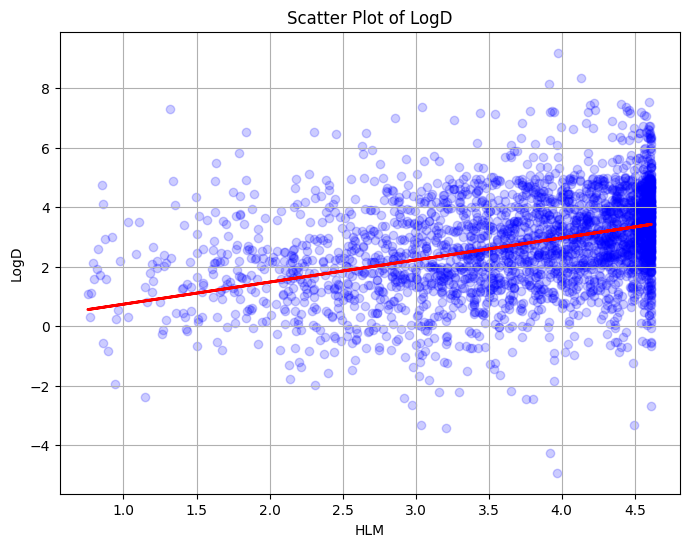

In [145]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(train_ov['HLM'], train_ov['LogD'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of LogD')
plt.xlabel('HLM')
plt.ylabel('LogD')

# 선형 회귀 모델 학습
X = np.array(train_ov['HLM']).reshape(-1, 1)
y = train_ov['LogD']

# 절편을 100으로 고정한 선형 회귀 모델 생성
fixed_intercept = 0
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y - fixed_intercept)  # Adjusting the target variable

slope = reg.coef_[0]
regression_equation = f'LogD = {slope:.2f}*HLM + {fixed_intercept:.2f}'
print("회귀선의 공식:", regression_equation)

inverse_slope = 1 / slope
inverse_intercept = -fixed_intercept / slope
inverse_regression_equation = f'HLM  = {inverse_slope:.2f}*LogD + {inverse_intercept:.2f}'
print("역함수의 공식:", inverse_regression_equation)

# 회귀선 그리기 (절편을 고정했으므로 y절편은 고정된 값)
plt.plot(X, reg.predict(X) + fixed_intercept, color='red', linewidth=2)

plt.grid(True)
plt.show()


회귀선의 공식: LogD = 0.69*MLM + 0.00
역함수의 공식: MLM  = 1.46*LogD + 0.00


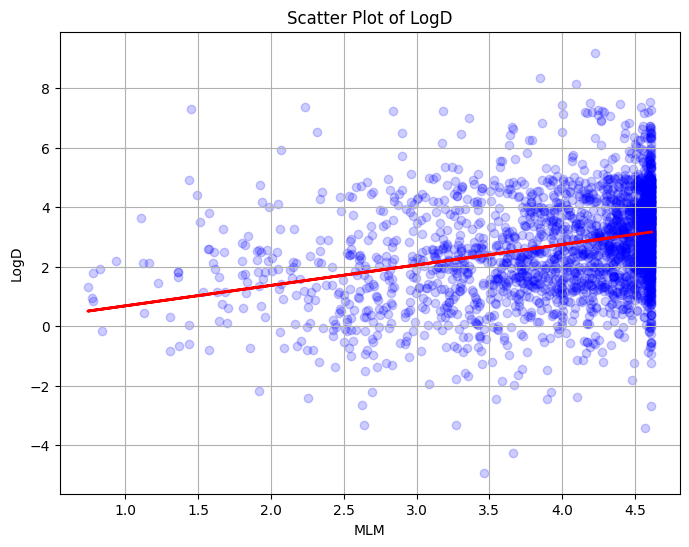

In [146]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(train_ov['MLM'], train_ov['LogD'], c='blue', marker='o', alpha=0.2)
plt.title('Scatter Plot of LogD')
plt.xlabel('MLM')
plt.ylabel('LogD')

# 선형 회귀 모델 학습
X = np.array(train_ov['MLM']).reshape(-1, 1)
y = train_ov['LogD']

# 절편을 100으로 고정한 선형 회귀 모델 생성
fixed_intercept = 0
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y - fixed_intercept)  # Adjusting the target variable

slope = reg.coef_[0]
regression_equation = f'LogD = {slope:.2f}*MLM + {fixed_intercept:.2f}'
print("회귀선의 공식:", regression_equation)

inverse_slope = 1 / slope
inverse_intercept = -fixed_intercept / slope
inverse_regression_equation = f'MLM  = {inverse_slope:.2f}*LogD + {inverse_intercept:.2f}'
print("역함수의 공식:", inverse_regression_equation)

# 회귀선 그리기 (절편을 고정했으므로 y절편은 고정된 값)
plt.plot(X, reg.predict(X) + fixed_intercept, color='red', linewidth=2)

plt.grid(True)
plt.show()


In [148]:
train_ov

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,4.317355,3.918403,3.259,400.495,5,2,8,3.259,117.37,4.5626
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,4.272909,3.920190,2.169,301.407,2,1,2,2.172,73.47,3.0408
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,4.558225,3.001118,1.593,297.358,5,0,3,1.585,62.45,2.2190
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.556925,4.595120,4.771,494.652,6,0,5,3.475,92.60,4.8650
5,TRAIN_0005,COc1c(F)c(F)cc2c(=O)c(C(=O)NCCCN3CCCC3=O)cn(C3...,4.295379,3.537184,1.335,419.422,4,1,7,1.335,78.95,1.8690
...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,4.599595,4.584161,3.409,396.195,3,1,5,3.409,64.74,4.7726
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,4.181134,3.977249,1.912,359.381,4,1,3,1.844,77.37,2.5816
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,3.803324,4.597239,1.941,261.320,3,1,6,2.124,70.14,2.9736
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,4.614130,4.587312,0.989,284.696,5,1,5,0.989,91.51,1.3846


In [150]:
# 연산 및 cal_HLM 컬럼 추가
train_ov['cal_MLM'] = 1.4 * train_ov['LogD']

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
train_ov['cal_MLM'] = train_ov['cal_MLM'].apply(lambda x: 0 if x < 0 else (np.log1p(100) if x > np.log1p(100) else x))

# 연산 및 cal_HLM 컬럼 추가
train_ov['cal_HLM'] = 1.4 * train_ov['LogD']

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
train_ov['cal_HLM'] = train_ov['cal_HLM'].apply(lambda x: 0 if x < 0 else (np.log1p(100) if x > np.log1p(100) else x))


<ipython-input-150-372541d7a6ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['cal_MLM'] = 1.4 * train_ov['LogD']
<ipython-input-150-372541d7a6ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['cal_MLM'] = train_ov['cal_MLM'].apply(lambda x: 0 if x < 0 else (np.log1p(100) if x > np.log1p(100) else x))
<ipython-input-150-372541d7a6ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [151]:
train_ov

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,cal_MLM,cal_HLM
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,4.317355,3.918403,3.259,400.495,5,2,8,3.259,117.37,4.562600,4.562600
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,4.272909,3.920190,2.169,301.407,2,1,2,2.172,73.47,3.040800,3.040800
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,4.558225,3.001118,1.593,297.358,5,0,3,1.585,62.45,2.219000,2.219000
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.556925,4.595120,4.771,494.652,6,0,5,3.475,92.60,4.615121,4.615121
5,TRAIN_0005,COc1c(F)c(F)cc2c(=O)c(C(=O)NCCCN3CCCC3=O)cn(C3...,4.295379,3.537184,1.335,419.422,4,1,7,1.335,78.95,1.869000,1.869000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,4.599595,4.584161,3.409,396.195,3,1,5,3.409,64.74,4.615121,4.615121
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,4.181134,3.977249,1.912,359.381,4,1,3,1.844,77.37,2.581600,2.581600
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,3.803324,4.597239,1.941,261.320,3,1,6,2.124,70.14,2.973600,2.973600
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,4.614130,4.587312,0.989,284.696,5,1,5,0.989,91.51,1.384600,1.384600


In [152]:
# 연산 및 cal_HLM 컬럼 추가
test_data['cal_MLM'] = 1.4 * test_data['LogD']

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
test_data['cal_MLM'] = test_data['cal_MLM'].apply(lambda x: 0 if x < 0 else (np.log1p(100) if x > np.log1p(100) else x))

# 연산 및 cal_HLM 컬럼 추가
test_data['cal_HLM'] = 1.4 * test_data['LogD']

# 0 미만 값은 0으로, 100 초과 값은 100으로 설정
test_data['cal_HLM'] = test_data['cal_HLM'].apply(lambda x: 0 if x < 0 else (np.log1p(100) if x > np.log1p(100) else x))

In [155]:
train_ov['MLM_diff'] = train_ov['MLM'] - train_ov['cal_MLM']
train_ov['HLM_diff'] = train_ov['HLM'] - train_ov['cal_HLM']

<ipython-input-155-fbaa7961e301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['MLM_diff'] = train_ov['MLM'] - train_ov['cal_MLM']
<ipython-input-155-fbaa7961e301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['HLM_diff'] = train_ov['HLM'] - train_ov['cal_HLM']


In [160]:
def generate_fingerprints(data):
    fp_list = []
    for idx, smiles in enumerate(data['SMILES']):
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096)
        fp_list.append(fp)

    fp_bit_list = []
    for fp in fp_list:
        fp_bit_list.append([int(x) for x in fp.ToBitString()])

    dic = {}
    for idx in range(4096):
        key = "F" + str(idx)
        dic[key] = []

    for fp in fp_bit_list:
        for idx in range(4096):
            key = "F" + str(idx)
            dic[key].append(fp[idx])

    fingerprint_df = pd.DataFrame(dic)
    return fingerprint_df

In [162]:
train_fp = generate_fingerprints(train_ov)
test_fp = generate_fingerprints(test_data)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define features and targets
non_features = ['id', 'SMILES', 'MLM', 'HLM', 'Fingerprint', 'AlogP']
mlm_target = "MLM"
hlm_target = "HLM"

# Initialize KFold
seed = 42
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

# Initialize arrays to store models and scores
reg_mlms = []
reg_hlms = []

# Initialize arrays to store RMSE scores
mlm_rmse_scores = []
hlm_rmse_scores = []

# Loop through KFold splits
for i, (train_index, valid_index) in enumerate(kf.split(train_MLM)):
    df_train = train_MLM.iloc[train_index]
    df_valid = train_MLM.iloc[valid_index]

    df_train_fp = train_fp_MLM.iloc[train_index]
    df_valid_fp = train_fp_MLM.iloc[valid_index]

    x_train_num = df_train[features].values
    x_train_fingerprint =  df_train_fp.values  # Extract fingerprints

    y_mlm_train = df_train[mlm_target].values

    x_valid_num = df_valid[features].values
    x_valid_fingerprint = df_valid_fp.values  # Extract fingerprints

    y_mlm_valid = df_valid[mlm_target].values

    # 이미지 입력 경로
    x1_input = keras.Input(shape=(x_train_num.shape[1],))
    x1 = layers.Dense(128, activation='relu')(x1_input)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)
    x1 = layers.Dense(256, activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)
    x1 = layers.Dense(512, activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)

    # # 비트 입력 경로
    x2_input = keras.Input(shape=(x_train_fingerprint.shape[1],))
    x2 = layers.Flatten()(x2_input)
    x2 = layers.Dropout(0.4)(x2)

    # 경로 병합
    merged = layers.concatenate([x1, x2])
    merged = layers.Dense(1024, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(512, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(256, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(128, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)

    # 회귀 모델 출력 레이어 추가
    outputs = layers.Dense(1)(merged)

    # 모델 생성
    model = keras.Model(inputs=[x1_input, x2_input], outputs=outputs)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0008,
    decay_steps=8,
    decay_rate=0.98)
    optimizer_decay = keras.optimizers.SGD(learning_rate=lr_schedule)

    model.compile(optimizer=optimizer_decay, loss='mean_squared_error', metrics=[RootMeanSquaredError()])


    # Train the model
    checkpoint_mlm = ModelCheckpoint(f'model_mlm_fold{i}.h5', monitor='val_loss', verbose=0, save_best_only=True)
    early_stopping_mlm = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model.fit([x_train_num, x_train_fingerprint], y_mlm_train, epochs=500, batch_size=16, verbose=1, validation_data=([x_valid_num, x_valid_fingerprint], y_mlm_valid),
              callbacks=[checkpoint_mlm, early_stopping_mlm])

    reg_mlms.append(model)

    # Calculate RMSE for MLM predictions
    y_mlm_pred = model.predict([x_valid_num, x_valid_fingerprint])
    mlm_rmse = math.sqrt(mean_squared_error(y_mlm_valid, y_mlm_pred))
    print(mlm_rmse)
    mlm_rmse_scores.append(mlm_rmse)